Imports & Setup

In [1]:
# Fraud Detection - Data Preprocessing
# File: notebooks/03_preprocessing.ipynb

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')


Load Dataset

In [2]:
# ============================================
# LOAD DATASET
# ============================================

print("="*60)
print("LOADING DATASET FOR PREPROCESSING")
print("="*60)

df = pd.read_csv('../data/creditcard.csv')
print(f"✅ Dataset loaded: {df.shape[0]:,} rows, {df.shape[1]} columns")
print(f"   Fraud cases: {df['Class'].sum():,}")
print(f"   Legitimate cases: {(len(df) - df['Class'].sum()):,}\n")


LOADING DATASET FOR PREPROCESSING
✅ Dataset loaded: 284,807 rows, 31 columns
   Fraud cases: 492
   Legitimate cases: 284,315



Handle Missing Values

In [3]:
# ============================================
# TASK 3.1: HANDLE MISSING VALUES
# ============================================

print("="*60)
print("STEP 1: HANDLING MISSING VALUES")
print("="*60)

missing_values = df.isnull().sum().sum()
print(f"\n🔍 Total missing values: {missing_values}")

if missing_values > 0:
    print("⚠️ Missing values detected. Handling them...")
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        if df[col].isnull().sum() > 0:
            df[col].fillna(df[col].median(), inplace=True)
    print("✅ Missing values filled with median")
else:
    print("✅ No missing values found. Dataset is clean!")


STEP 1: HANDLING MISSING VALUES

🔍 Total missing values: 0
✅ No missing values found. Dataset is clean!


Remove Duplicates

In [4]:
# ============================================
# TASK 3.2: REMOVE DUPLICATES (IF ANY)
# ============================================

print("\n" + "="*60)
print("STEP 2: REMOVING DUPLICATES")
print("="*60)

initial_rows = len(df)
df.drop_duplicates(inplace=True)
removed_duplicates = initial_rows - len(df)

print(f"🔄 Duplicate rows removed: {removed_duplicates}")
print(f"✅ Dataset shape after removing duplicates: {df.shape}")



STEP 2: REMOVING DUPLICATES
🔄 Duplicate rows removed: 1081
✅ Dataset shape after removing duplicates: (283726, 31)


Feature Scaling (Standardization)

In [5]:
# ============================================
# TASK 3.3: NORMALIZE/SCALE FEATURES
# ============================================

print("\n" + "="*60)
print("STEP 3: FEATURE SCALING (NORMALIZATION)")
print("="*60)

df_original = df.copy()

print("\n📊 Before scaling:")
print(f"   Amount - Mean: {df['Amount'].mean():.2f}, Std: {df['Amount'].std():.2f}")
print(f"   Time - Mean: {df['Time'].mean():.2f}, Std: {df['Time'].std():.2f}")

scaler = StandardScaler()

df['Amount_Scaled'] = scaler.fit_transform(df[['Amount']])
df['Time_Scaled'] = scaler.fit_transform(df[['Time']])

print("\n📊 After scaling:")
print(f"   Amount_Scaled - Mean: {df['Amount_Scaled'].mean():.4f}, Std: {df['Amount_Scaled'].std():.4f}")
print(f"   Time_Scaled - Mean: {df['Time_Scaled'].mean():.4f}, Std: {df['Time_Scaled'].std():.4f}")

df.drop(['Amount', 'Time'], axis=1, inplace=True)

print("\n✅ Scaling complete!")



STEP 3: FEATURE SCALING (NORMALIZATION)

📊 Before scaling:
   Amount - Mean: 88.47, Std: 250.40
   Time - Mean: 94811.08, Std: 47481.05

📊 After scaling:
   Amount_Scaled - Mean: -0.0000, Std: 1.0000
   Time_Scaled - Mean: 0.0000, Std: 1.0000

✅ Scaling complete!


Visualize Scaling


📊 Visualizing scaling effect...


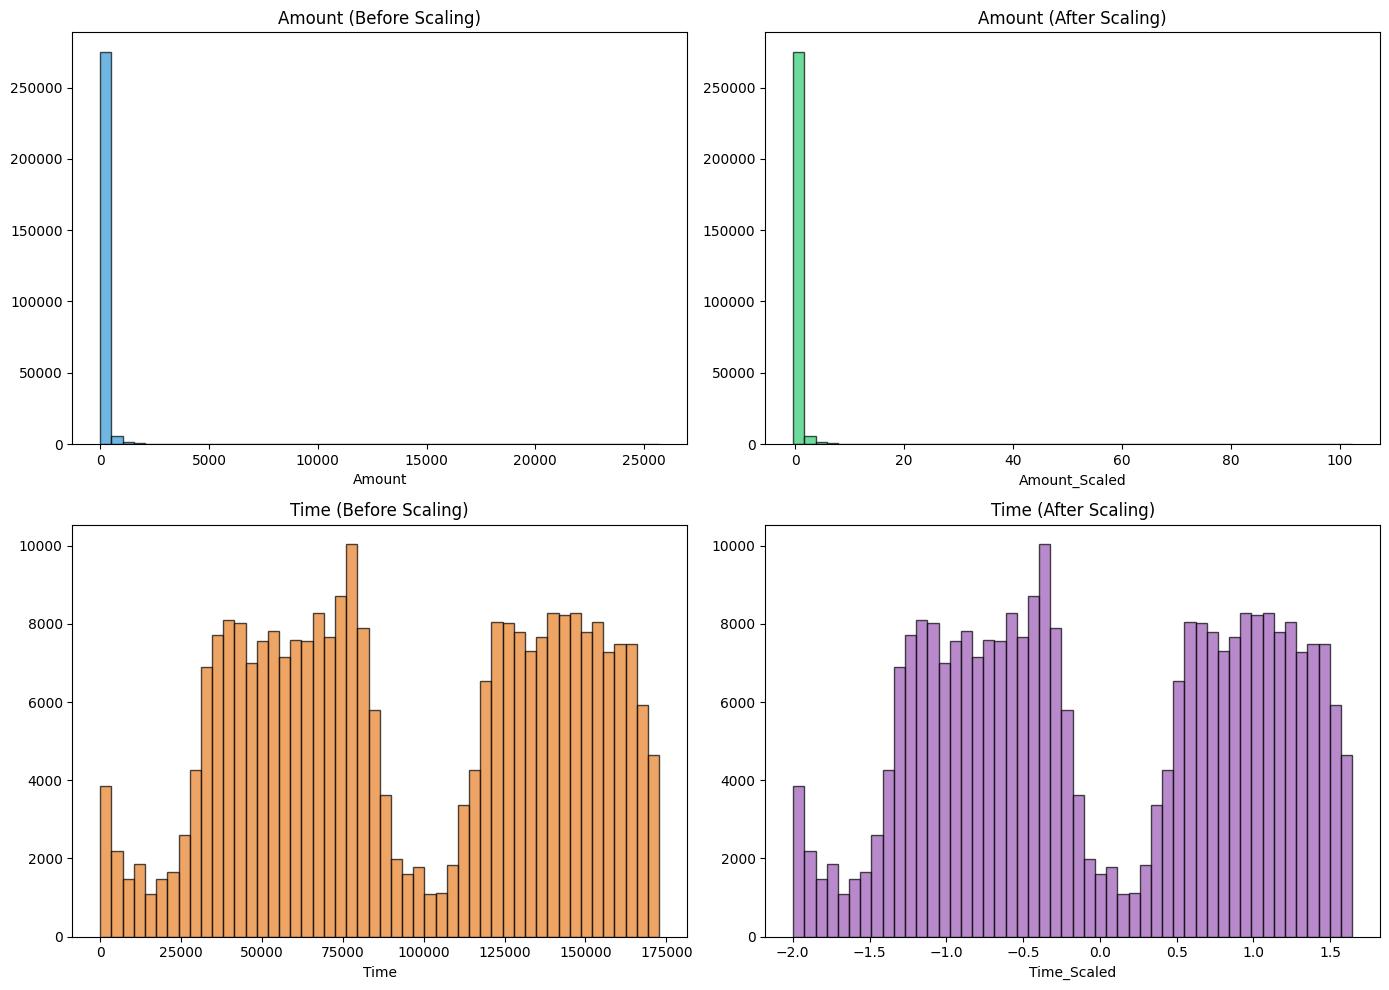

✅ Saved: reports/scaling_visualization.png


In [6]:
# ============================================
# VISUALIZE SCALING EFFECT
# ============================================

print("\n📊 Visualizing scaling effect...")

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Before scaling - Amount
axes[0, 0].hist(df_original['Amount'], bins=50, color='#3498db', alpha=0.7, edgecolor='black')
axes[0, 0].set_xlabel('Amount')
axes[0, 0].set_title('Amount (Before Scaling)')

# After scaling - Amount
axes[0, 1].hist(df['Amount_Scaled'], bins=50, color='#2ecc71', alpha=0.7, edgecolor='black')
axes[0, 1].set_xlabel('Amount_Scaled')
axes[0, 1].set_title('Amount (After Scaling)')

# Before scaling - Time
axes[1, 0].hist(df_original['Time'], bins=50, color='#e67e22', alpha=0.7, edgecolor='black')
axes[1, 0].set_xlabel('Time')
axes[1, 0].set_title('Time (Before Scaling)')

# After scaling - Time
axes[1, 1].hist(df['Time_Scaled'], bins=50, color='#9b59b6', alpha=0.7, edgecolor='black')
axes[1, 1].set_xlabel('Time_Scaled')
axes[1, 1].set_title('Time (After Scaling)')

plt.tight_layout()
plt.savefig('../reports/scaling_visualization.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Saved: reports/scaling_visualization.png")


Split Train/Val/Test

In [7]:
# ============================================
# TASK 3.4: SPLIT DATA (TRAIN/VALIDATION/TEST)
# ============================================

print("\n" + "="*60)
print("STEP 4: SPLITTING DATA INTO TRAIN/VAL/TEST SETS")
print("="*60)

X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print("\n📊 Split complete!")



STEP 4: SPLITTING DATA INTO TRAIN/VAL/TEST SETS

📊 Split complete!


Visualize Data Split


📊 Visualizing data split...


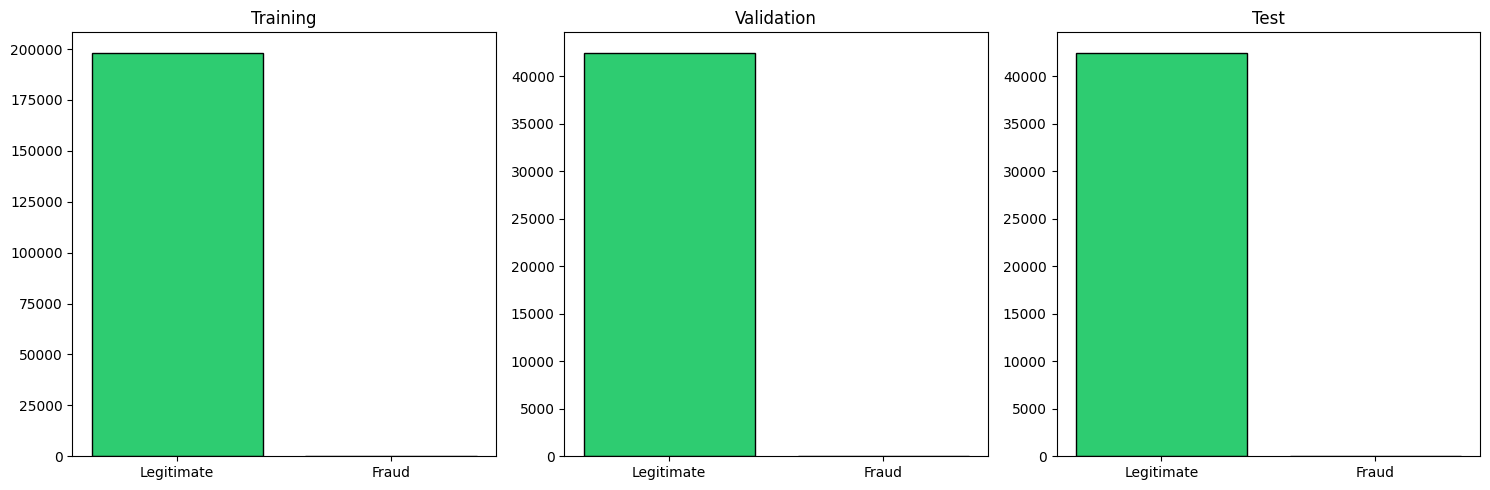

✅ Saved: reports/data_split_visualization.png


In [8]:
# ============================================
# VISUALIZE SPLIT
# ============================================

print("\n📊 Visualizing data split...")

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

datasets = [(y_train, 'Training'), (y_val, 'Validation'), (y_test, 'Test')]

for idx, (y_data, title) in enumerate(datasets):
    counts = y_data.value_counts()
    axes[idx].bar(['Legitimate', 'Fraud'], counts.values,
                  color=['#2ecc71', '#e74c3c'], edgecolor='black')
    axes[idx].set_title(title)
    
plt.tight_layout()
plt.savefig('../reports/data_split_visualization.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Saved: reports/data_split_visualization.png")


Save Processed Data + Scaler

In [9]:
# ============================================
# TASK 3.5: SAVE PROCESSED DATA
# ============================================

X_train.to_csv('../data/X_train.csv', index=False)
X_val.to_csv('../data/X_val.csv', index=False)
X_test.to_csv('../data/X_test.csv', index=False)

y_train.to_csv('../data/y_train.csv', index=False)
y_val.to_csv('../data/y_val.csv', index=False)
y_test.to_csv('../data/y_test.csv', index=False)

with open('../models/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("✅ All processed data saved.")


✅ All processed data saved.


Save Summary

In [10]:
# ============================================
# SAVE PREPROCESSING SUMMARY
# ============================================

summary = {
    'original_shape': df_original.shape,
    'processed_shape': df.shape,
    'train_samples': len(X_train),
    'val_samples': len(X_val),
    'test_samples': len(X_test),
    'fraud_percentage_train': float(y_train.mean()*100),
    'fraud_percentage_val': float(y_val.mean()*100),
    'fraud_percentage_test': float(y_test.mean()*100)
}

with open('../reports/preprocessing_summary.txt', 'w') as f:
    f.write("PREPROCESSING SUMMARY\n")
    f.write("="*60 + "\n\n")
    for k, v in summary.items():
        f.write(f"{k}: {v}\n")

print("✅ Summary saved.")


✅ Summary saved.


Final Summary Output

In [11]:
# ============================================
# FINAL PREPROCESSING SUMMARY
# ============================================

print("\n" + "="*60)
print("PREPROCESSING COMPLETE! SUMMARY:")
print("="*60)

print(f"Original rows: {df_original.shape[0]:,}")
print(f"Processed rows: {df.shape[0]:,}")
print("🎉 Ready for Model Training!")



PREPROCESSING COMPLETE! SUMMARY:
Original rows: 283,726
Processed rows: 283,726
🎉 Ready for Model Training!
